# Model, entropy, finding the level of surprising outcomes


## Structure of notebook.

0. Import libraries
1. What is a model?
2. Use of simulated data
3. Logistic regression and errors
4. Probabilities
5. How could the ground truth help making some accurate predictions?
6. Let's recap
7. A simulated low cross entropy
8. A simulated hig cross entropy
9. Some reading...




# Import libraries

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import random
from sklearn.metrics import confusion_matrix
 

# What is a model?

Models capture the nature of some data as simply as possible. The basic structure of a statistical model considers data as the sum of a model and some errors.  
 
$\widehat{𝑑𝑎𝑡𝑎} = 𝑚𝑜𝑑𝑒𝑙 + 𝑒𝑟𝑟𝑜𝑟$

The model expresses the values we expect the data to be take given our knowledge.   The error reflects the differences between the model’s prediction and the observed data.  



# Some simulated data

## Training dataset 

We use some randomly simulated some temperatures. This sample is likely to be different each time the notebook is executed. 

In [2]:
x = []
for i in range(0, 32):
    x = np.append(x, random.randint(10, 40))

x = np.sort(x).reshape(-1,1)
print("Mean =", np.mean(x))
print("Standard deviation =", np.std(x))



Mean = 27.3125
Standard deviation = 9.72894360914894


(array([2., 1., 2., 0., 2., 0., 4., 0., 0., 1., 1., 1., 2., 0., 4., 1., 3.,
        0., 3., 5.]),
 array([10. , 11.5, 13. , 14.5, 16. , 17.5, 19. , 20.5, 22. , 23.5, 25. ,
        26.5, 28. , 29.5, 31. , 32.5, 34. , 35.5, 37. , 38.5, 40. ]),
 <BarContainer object of 20 artists>)

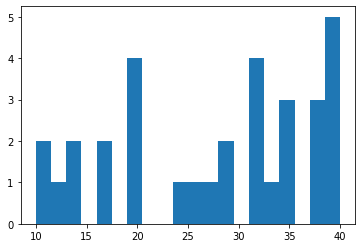

In [3]:
plt.hist(x,bins = 20)

__Ground truth - y - labelled data:__ 

We use two classes, i.e., 0 an 1.  These classes can represent genders, on and off - any two states. In our case, it is the use of air-conditioned system. 

In [4]:
y = []
for i in range(0, 32):
    y = np.append(y, random.randint(0, 1))

y

y = np.sort(y).reshape(-1,1)
y
print("Mean =", np.mean(y))
print("Standard deviation =", np.std(y))


Mean = 0.5
Standard deviation = 0.5


(array([16., 16.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

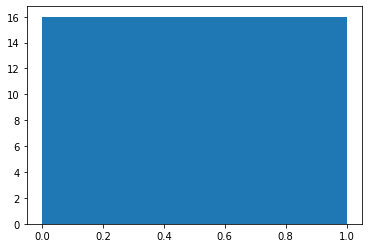

In [5]:
plt.hist(y,bins = 2)

This is a graphical representation of the temperatures and on/off use of air condition systems.  

The data appears to have clearly two states, and there may be suited to create a model using a logistic regression.



Text(0, 0.5, 'Air conditioned system on/off')

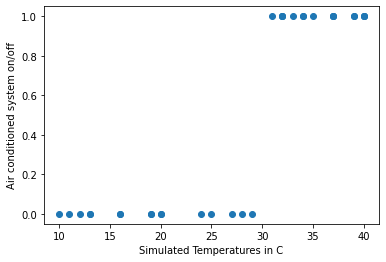

In [6]:
plt.scatter(x, y)
plt.xlabel("Simulated Temperatures in C")
plt.ylabel("Air conditioned system on/off")



## Testing dataset 

We use some randomly simulated some temperatures. This sample is likely to be different each time the notebook is executed. 

In [7]:
x_test = []
for i in range(0, 32):
    x_test = np.append(x_test, random.randint(20, 40))

x_test = np.sort(x_test).reshape(-1,1)
print("Mean =", np.mean(x_test))
print("Standard deviation =", np.std(x_test))



Mean = 29.90625
Standard deviation = 6.201609544102241


(array([2., 1., 2., 0., 2., 0., 4., 0., 0., 1., 1., 1., 2., 0., 4., 1., 3.,
        0., 3., 5.]),
 array([10. , 11.5, 13. , 14.5, 16. , 17.5, 19. , 20.5, 22. , 23.5, 25. ,
        26.5, 28. , 29.5, 31. , 32.5, 34. , 35.5, 37. , 38.5, 40. ]),
 <BarContainer object of 20 artists>)

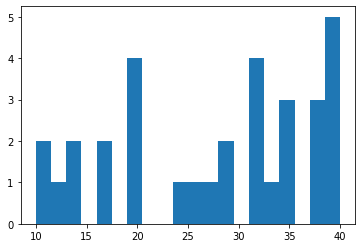

In [8]:
plt.hist(x,bins = 20)

__Ground truth - y - labelled data:__ 

We use two classes, i.e., 0 an 1.  These classes can represent genders, on and off - any two states. In our case, it is the use of air-conditioned system. 

In [9]:
y_test = []
for i in range(0, 32):
    y_test = np.append(y_test, random.randint(0, 1))

y_test

y_test = np.sort(y_test).reshape(-1,1)

print("Mean =", np.mean(y_test))
print("Standard deviation =", np.std(y_test))


Mean = 0.375
Standard deviation = 0.4841229182759271


(array([20., 12.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

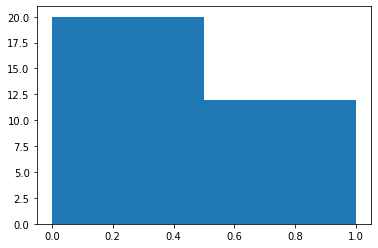

In [10]:
plt.hist(y_test,bins = 2)

This is a graphical representation of the temperatures and on/off use of air condition systems.  

The data appears to have clearly two states, and there may be suited to create a model using a logistic regression.



Text(0, 0.5, 'Air conditioned system on/off')

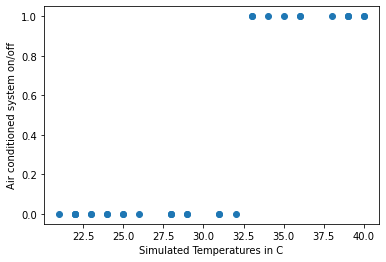

In [11]:
plt.scatter(x_test, y_test)
plt.xlabel("Simulated Temperatures in C")
plt.ylabel("Air conditioned system on/off")



# Logistic regression and errors

[Logistic regression explained](https://realpython.com/logistic-regression-python/)

This code fits a logistic curve using the simulated dataset. We aim to search whether a logistic pattern exists within the data, and hence may need to be use for predicting the use of temperatures and the use of air conditioned systems.

## The model fitting

In [12]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(x, y)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=42, solver='liblinear')

Model classes:

In [13]:
model.classes_

array([0., 1.])

Model.intercepts:

In [14]:
model.intercept_


array([-2.44153054])

In [15]:
model.coef_

array([[0.10245218]])

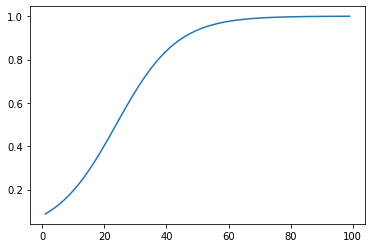

In [16]:
values = np.arange(1,100).reshape(-1,1)
points = 1/(1+np.exp(-(model.intercept_ + model.coef_ * values)))
plt.plot(values, points)


Model coefficients:

## Evaluation of the model

In [17]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

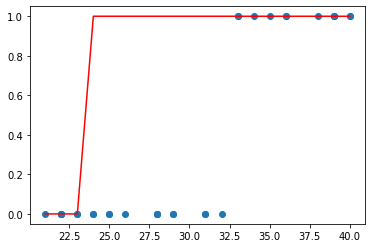

In [18]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')

# Can we use this model to make some decision?

We know the ground truth - _y_ -, it has been observed when we captured the data. 

We know a predicted outcome - $\widehat{y}$ - we have computed those using a prediction technique; i.e., a form of regression, decision trees, random forrest, Neural-AI, this list is not exhaustive.



## Confusion matrices and metrics

The outcome a model fitting process is evaluated using some metrics that measures the number of errors in the prediction against actual some labels data.  

The model accuracy on the _training_ dataset is given below. This data was used for __training__. 

In [19]:
model.score(x, y)

0.84375

__Testing data__

If this score is much lower, then we may have some overfitting to the training dataset.

In [20]:
model.score(x_test, y_test)

0.59375

Number of errors or mis-predictions:

In [21]:

print("Total incorrect      : ", sum(abs(y_test - y_pred)))
print("percentage incorrect : ", sum(abs(y_test - y_pred))/len(x))

Total incorrect      :  [12. 12. 12. 12. 12. 12. 12. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
percentage incorrect :  [0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.625 0.625 0.625 0.625 0.625
 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625
 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625]


### Metrics
For binary classification (True/False) such as logistic regression four possible events can occur. 

- __True positives (TP):__ The number of correct predictions for the true class; i.e., the number of predicted True class that are known to be true. 
- __True negatives (TN):__ The number of correct predictions for the false class; i.e., the number of predicted False class that are known to be False. 
- __False positives (FP):__ The number of erroneous predictions for the True class; i.e., the number of predicted True class that are known to be False. 
- __False negatives (FN):__ The number of erroneous predictions for the False class; i.e., the number of predicted False class that are known to be True. 

### Confusion matrix 
A confusion matrix counts the number True positives, False positives, True negatives, and False negatives.  It represents in a table the actual values against the predicted values of a testing dataset. The correct predictions are shown in green with white font. The errorneous predictions in black and orange background. 

|   |Predicted_0|Predicted_1|
|---|---|---|
|__Actual_0__| False positives|False negatives|
|__Actual_1__| True negatives|True positives|

So in our example below produces this confusion matrix:

In [22]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 7, 13],
       [ 0, 12]])

### Measures of quality 

The measures of quality for a predictive model are expressed using several performance metric referred as precision, recall, and accuracy. These metrics are probabilities computed using the following mathematical formulae. 
 
Accuracy describes how the model perform across all classes (True and False). It  adds the diagonal values of a confusion matrix and divide by the total of possible outcomes.  
 
$𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦= \frac{TP + TN}{TP + TN + FP + FN}$

 

In [23]:
Accuracy = (cm[1][1] + cm[0][0])/(cm[1][1] + cm[1][0] + cm[0][0] + cm[0][1])
Accuracy

0.59375

Precision measures the model’s accuracy in prediction the True class as a sample. It reflects how reliable the model is in classifying samples as positive. It is a probability based on the class columns the confusion matrix (green cells).  The precision can be computed for each class. 

$Precision = \frac{TP}{TP +  FP }$

In [24]:
Precision = (cm[1][1])/(cm[1][1] + cm[0][0])
Precision

0.631578947368421

Recall is the probability to detect positive classes. It can be calculated for each class. It is a probability is obtained by dividing the true positive by the sum of the true positive and false negative; i.e., the class row of the confusion matrix.  

$Recall = \frac{TP}{TP + FN}$

In [25]:
Recall = (cm[1][1])/(cm[1][1] + cm[0][1])
Precision

0.631578947368421

## Can we use this model for making some accurate predictions?

Your call....

# Probabilities

Let's play Heads or Tails. We represent tails as 0 and heads as 1. We try to find out the probability randomly obtaining Head. We are playing 100 times. 
 

In [26]:
sample = [random.randint(0,1) for x in range(101)] 
no_heads = sum(sample) 
P_head = no_heads/len(sample) 
print("Probability to land a head is : ", P_head) 

Probability to land a head is :  0.46534653465346537


__A high level of probability event__ suggests some unsurprising results. We can trust a prediction. 

__A low level of probability event__ suggest some surprising results. We cannot trust a prediction.

Probability of finding each temperature in our samples; x and x_test.

In [27]:
N     = len(x)
probs_x = [np.count_nonzero(x == x_i)/N for x_i in x]
[row for row in zip(x,probs_x)] 

[(array([10.]), 0.03125),
 (array([11.]), 0.03125),
 (array([12.]), 0.03125),
 (array([13.]), 0.0625),
 (array([13.]), 0.0625),
 (array([16.]), 0.0625),
 (array([16.]), 0.0625),
 (array([19.]), 0.0625),
 (array([19.]), 0.0625),
 (array([20.]), 0.0625),
 (array([20.]), 0.0625),
 (array([24.]), 0.03125),
 (array([25.]), 0.03125),
 (array([27.]), 0.03125),
 (array([28.]), 0.03125),
 (array([29.]), 0.03125),
 (array([31.]), 0.03125),
 (array([32.]), 0.09375),
 (array([32.]), 0.09375),
 (array([32.]), 0.09375),
 (array([33.]), 0.03125),
 (array([34.]), 0.0625),
 (array([34.]), 0.0625),
 (array([35.]), 0.03125),
 (array([37.]), 0.09375),
 (array([37.]), 0.09375),
 (array([37.]), 0.09375),
 (array([39.]), 0.0625),
 (array([39.]), 0.0625),
 (array([40.]), 0.09375),
 (array([40.]), 0.09375),
 (array([40.]), 0.09375)]

In [28]:
N     = len(y)
probs_y = [np.count_nonzero(y == y_i)/N for y_i in y]
[row for row in zip(y,probs_y)] 

[(array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([0.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5),
 (array([1.]), 0.5)]

In [29]:
N     = len(x_test)
probs_x_test = [np.count_nonzero(x_test == x_i)/N for x_i in x_test]
[row for row in zip(x_test,probs_x_test)] 

[(array([21.]), 0.03125),
 (array([22.]), 0.125),
 (array([22.]), 0.125),
 (array([22.]), 0.125),
 (array([22.]), 0.125),
 (array([23.]), 0.0625),
 (array([23.]), 0.0625),
 (array([24.]), 0.0625),
 (array([24.]), 0.0625),
 (array([25.]), 0.0625),
 (array([25.]), 0.0625),
 (array([26.]), 0.03125),
 (array([28.]), 0.09375),
 (array([28.]), 0.09375),
 (array([28.]), 0.09375),
 (array([29.]), 0.0625),
 (array([29.]), 0.0625),
 (array([31.]), 0.0625),
 (array([31.]), 0.0625),
 (array([32.]), 0.03125),
 (array([33.]), 0.0625),
 (array([33.]), 0.0625),
 (array([34.]), 0.03125),
 (array([35.]), 0.03125),
 (array([36.]), 0.0625),
 (array([36.]), 0.0625),
 (array([38.]), 0.03125),
 (array([39.]), 0.09375),
 (array([39.]), 0.09375),
 (array([39.]), 0.09375),
 (array([40.]), 0.0625),
 (array([40.]), 0.0625)]

In [30]:
N     = len(y_test)
probs_y_test = [np.count_nonzero(y_test == y_i)/N for y_i in y_test]
[row for row in zip(y_test,probs_y_test)] 

[(array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([0.]), 0.625),
 (array([1.]), 0.375),
 (array([1.]), 0.375),
 (array([1.]), 0.375),
 (array([1.]), 0.375),
 (array([1.]), 0.375),
 (array([1.]), 0.375),
 (array([1.]), 0.375),
 (array([1.]), 0.375),
 (array([1.]), 0.375),
 (array([1.]), 0.375),
 (array([1.]), 0.375),
 (array([1.]), 0.375)]

# How could the ground truth help making some accurate predictions?

We know a predicted outcome - $\widehat{y}$ - we have computed those using a prediction technique; i.e., a form of regression, decision trees, random forrest, Neural-AI, this list is not exhaustive.


__Information:__ The level of surprise we may gain from some observations against the ground truth.

__We want to lower the level of uncertainty by increasing the probability of predicting an accurate value.__

## The entropy
__The entropy__ of a random variable is a measure of its uncertainty
and a measure of the average amount of information required to describe the random variable (Cover & Thomas, 2006).  

Entropy is measured in bits and a measure of disorders within the data.

Our random sample of temperatures is a discrete random variable. The entropy $H(X)$ is

$H(X) = - \sum p(x_i) log_2 (p(x_i))$

__Entropy of training temperatures:__


In [31]:
i_s = range(0,len(probs_x)-1)
# p(x) log_2 (p(x))
log_prob = [probs_x[i] * math.log(probs_x[i],2) for i in i_s]
# sum 
sum_log_prob = np.sum(log_prob)

# Apply -
# Apply -
entropy = -1 * sum_log_prob
print("Entropy (bits): ", entropy)

Entropy (bits):  7.280028124459134


__Entropy of testing temperatures:__

In [32]:
i_s = range(0,len(probs_x_test)-1)
# p(x) log_2 (p(x))
log_prob = [probs_x_test[i] * math.log(probs_x_test[i],2) for i in i_s]
# sum 
sum_log_prob = np.sum(log_prob)

# Apply -
# Apply -
entropy = -1 * sum_log_prob
print("Entropy (bits): ", entropy)

Entropy (bits):  8.10845859334435


__Entropy of training y_labels:__

In [33]:
i_s = range(0,len(probs_y)-1)
# p(x) log_2 (p(x))
log_prob = [probs_y[i] * math.log(probs_y[i],2) for i in i_s]
# sum 
sum_log_prob = np.sum(log_prob)

# Apply -
entropy = -1 * sum_log_prob
print("Entropy (bits) : ", entropy)

Entropy (bits) :  15.5


__Entropy of testing y_labels:__

In [34]:
i_s = range(0,len(probs_y_test)-1)
# p(x) log_2 (p(x))
log_prob = [probs_y_test[i] * math.log(probs_y_test[i],2) for i in i_s]
# sum 
sum_log_prob = np.sum(log_prob)

# Apply -
entropy = -1 * sum_log_prob
print("Entropy (bits) : ", entropy)

Entropy (bits) :  14.312928498433202


## Cross entropy

An indication of the __difference between the ground truth and the predicted outcomes__ is the cross entropy. For your interest, the cross entropy is 
$H(p,q) = − \sum p_i log_2(q(x_))$

p(x) is the truth value probabilities for a class 
q(x) is the predicted values of a class 

When we unroll the sum we obtain:

$H(P, Q) = – (P(class0) * log(Q(class0)) + P(class1) * log(Q(class1))$





We continue with our exploration by finding the level of surprises for each predicted values.... 



In [35]:
y_pred = model.predict(x_test)
classes = [0,1]







We have seen earlier for the class - i.e. on/off - the probability is the same.

In [36]:

probs_y_test = [np.count_nonzero(y_test == class_value)/N for class_value in classes]
probs_y_pred = [np.count_nonzero(y_pred == class_value)/N for class_value in classes]

print("prob_y_test ", probs_y_test)
print("prob_y_pred ", probs_y_pred)

prob_y_test  [0.625, 0.375]
prob_y_pred  [0.21875, 0.78125]


We calculation the log probabiity and then the cross-entropy.

In [37]:
# p(x) log_2 (p(x))
log_prob = [probs_y_test[i] * math.log(probs_y_pred[i],2) for i in [0,1]]
print("log_prob : ", log_prob)

# sum 
sum_log_prob = np.sum(log_prob)

# Apply -
cross_entropy = -1 * sum_log_prob

cross_entropy

log_prob :  [-1.3704031737139977, -0.13355392883447825]


1.503957102548476

# Let's recap

Models capture the nature of some data as simply as possible. The basic structure of a statistical model considers data as the sum of a model and some errors.  
 
$\widehat{𝑑𝑎𝑡𝑎} = 𝑚𝑜𝑑𝑒𝑙 + 𝑒𝑟𝑟𝑜𝑟$

The model expresses the values we expect the data to be take given our knowledge.   The error reflects the differences between the model’s prediction and the observed data.  

If we have a model based on some known outcomes (i.e., labels), we can compute the probability of correct occurrences against these labels.  


For example, we obtain some predicted data and compare against the labels. We can then find the ratio of correct predictions; i.e., correct prediction/number of predictions (Accuracy). We did that earlier. 



## Cross entropy

The cross-entropy measures __the distance from the truth and a model__.



$H(p,q) = - \sum p(x) log_2 (q(x))$


- _p(x)_ represents the true distribution (i.e, the ground truth) 
- _q(x_) represents the predicted data from a model (i.e., probabilities) 
 
 
__our ground truth:__ p(x) was substituted with some probability of a value to occur in y label 

__our probabilities :__ q(x) is substituted with probabilities for a value occurring the predicted values 

__A large cross-entropy__ indicates the models is not appropriate; it predicts many erroneous outcomes. 

__A small cross-entropy__ indicates the reverse; the model can potentially predict many correct outcomes. 

I let you judgement based on the value below how we could trust our model to predict whether some air-condition systems may be in use based on some temperatures.
 

In [38]:
cross_entropy

1.503957102548476

# A simulated low cross-entropy

Such cross-entropy would suggest this model that predicted these predicted values is suitable to make some decision. The differences between the predicted values and ground truth is really close. 

We have some three classes [0,1,2]. The probability of 0 occurring is 0.6, 1 ocurring  is 0.3, and 2 occuring is 0.1.  The predicted probabilities are very close for each class; i.e., 0, 1,2.

In [ ]:
import math 
p_ground_truth = [0.6,0.3,0.1]
p_predicted    = [0.59, 0.29, 0.12] 
print("compute product of log_2 of q(x) * p(x):") 
log_prob = [p_ground_truth[i] * math.log(p_predicted[i],2) for i in range(3)] 
print("log probabilities : " ,log_prob) 
print("compute sum of log probabilities:") 
sum_log_prob = np.sum(log_prob) 
print("sum of log probabilities : ", sum_log_prob) 
cross_entropy = -1 * sum_log_prob 
print("cross entropy :", cross_entropy) 
 

# A simulated high cross-entropy

Such cross-entropy would suggest the model that produced these predicted values is __not suitable__ to make some decision. The differences between the predicted values and ground truth is high. 

We have some three classes [0,1,2]. The probability of 0 occurring is 0.6, 1 ocurring  is 0.3, and 2 occuring is 0.1.  The predicted probabilities are very close for each class; i.e., 0, 1,2.

In [ ]:
import math 
p_ground_truth = [0.6,0.3,0.1]
p_predicted    = [0.01, 0.02, 0.97] 
print("compute product of log_2 of q(x) * p(x):") 
log_prob = [ground_truth[i] * math.log(prob[i],2) for i in range(0,len(prob)-1)] 
print("log probabilities : " ,log_prob) 
print("compute sum of log probabilities:") 
sum_log_prob = np.sum(log_prob) 
print("sum of log probabilities : ", sum_log_prob) 
cross_entropy = -1 * sum_log_prob 
print("cross entropy :", cross_entropy) 
 

# Some reading

- [Feature selection using Joint Mutual Information Maximisation](https://reader.elsevier.com/reader/sd/pii/S0957417415004674?token=DDA193D18D23D9B2CD6A3D0CC03D4DF2455138BA646DC7934BD9EB7AA5F1F950DA8D1865323B6D3F043FDD1C2E656132&originRegion=eu-west-1&originCreation=20230207100115)

- [A Gentle Introduction to Cross-Entropy for Machine Learning](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)
- [Information gain and decisiont tree](https://www.section.io/engineering-education/entropy-information-gain-machine-learning/)
- [Cross-Entropy Loss and Its Applications in Deep Learning](https://neptune.ai/blog/cross-entropy-loss-and-its-applications-in-deep-learning)
